# Exercise 2: Logistic Regression

In [1]:
%matplotlib inline

from numpy import (eye, loadtxt, hstack, zeros, ones, dot, transpose, array,
                   meshgrid, float64, log, finfo, exp, mean, double)
from matplotlib import cm
from matplotlib.pyplot import plot, ylabel, xlabel, figure, subplots, legend, axis
from scipy.optimize import minimize

## Load Data

In [2]:
data = loadtxt('ex2data1.txt', dtype=float64, delimiter=',')
X, y = data[:, :2], data[:, -1].reshape(-1, 1)

## Part 1: Plotting

We start the exercise by first plotting the data to understand the the problem we are working with.

In [3]:
def plot2_data(X, y, data_labels, axis_labels):
    pos = y[:, 0] == 1
    neg = y[:, 0] == 0

    plot(X[pos, 0], X[pos, 1], 'k+', label=data_labels[0],
       markerfacecolor='b', markersize=7)
    plot(X[neg, 0], X[neg, 1], 'ko', label=data_labels[1],
       markerfacecolor='Y', markersize=7)

    # Put some labels
    if axis_labels and len(axis_labels) > 1:
        xlabel(axis_labels[0])
        ylabel(axis_labels[1])

Plotting data with `+` indicating (y = 1) examples and `o` indicating (y = 0) examples.

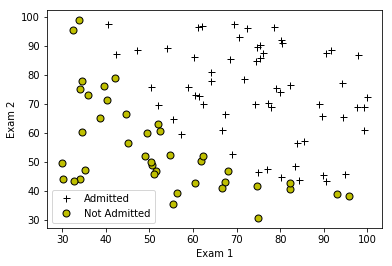

In [4]:
plot2_data(X, y,
          ['Admitted', 'Not Admitted'],
          ['Exam 1', 'Exam 2'])
legend(numpoints=1)

# Part 2: Compute Cost and Gradient

In [5]:
eps = finfo(float64).eps
# eps = 1e-5

def sigmoid(z):
    return 1. / (1. + exp(-z))

def cost_function(theta, X, y):
    """cost function"""

    m, n = X.shape
    theta = theta.reshape(n, 1)

    h_theta = sigmoid(X.dot(theta))
    h_theta[h_theta < eps] = eps
    h_theta[(1 - eps < h_theta) & (h_theta < 1 + eps)] = 1 - eps
    J = (- y.T.dot(log(h_theta)) - (1. - y).T.dot(log(1. - h_theta))) / m
    grad = X.T.dot(h_theta - y) / m

    return J[0, 0], grad.flatten()

In [6]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Initialize fitting parameters
initial_theta = zeros((n + 1, 1))


# Add intercept term to x and X_test
X = hstack((ones((m, 1)), X))

# Compute and display initial cost and gradient
cost, grad = cost_function(initial_theta, X, y)
print(f'''Cost at initial theta (zeros): {cost}
Gradient at initial theta (zeros): {grad}''')

Cost at initial theta (zeros): 0.6931471805599452
Gradient at initial theta (zeros): [ -0.1        -12.00921659 -11.26284221]


# Part 3: Optimizing using *minimize*

In [7]:
def plot_decision_boundary(theta, X, y, *args):

    # Plot Data
    plot2_data(X[:, 1:3], y, *args)

    n = X.shape[1]

    if n <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plot(plot_x, plot_y, label='Decision Boundary')

        # Legend, specific for the exercise
        axis([30, 100, 30, 100])

Cost at theta found by minimize: 0.2034977015894696
theta: [-25.16133643   0.20623177   0.2014716 ]


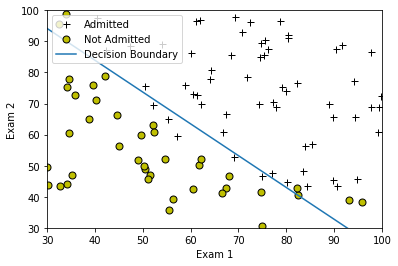

In [8]:
result = minimize(cost_function,
                  initial_theta,
                  args=(X, y),
                  method='BFGS',
                  jac=True,
                  options=dict(maxiter=400))
cost = result.fun
theta = result.x

print(f'''Cost at theta found by minimize: {cost}
theta: {theta}''')

plot_decision_boundary(theta, X, y,
                       ['Admitted', 'Not Admitted'],
                       ['Exam 1', 'Exam 2'])
legend(numpoints=1)

# Part 4: Predict and Accuracies

After learning the parameters, you'll like to use it to predict the
outcomes on unseen data. In this part, you will use the logistic
regression model to predict the probability that a student with score
45 on exam 1 and score 85 on exam 2 will be admitted.

Furthermore, you will compute the training and test set accuracies of
our model.

In [9]:
prob = sigmoid(array([1, 45, 85]).dot(theta))
print(f'''For a student with scores 45 and 85,
we predict an admission probability of {prob}''')

For a student with scores 45 and 85,
we predict an admission probability of 0.7762905650469852


In [10]:
# compute accuracy on our training set

def predict(theta, X):
    return (sigmoid(X.dot(theta)) >= 0.5).reshape((-1, 1))

p = predict(theta, X)
print(f'Train Accuracy: { mean(double(p == y)) * 100}%')

Train Accuracy: 89.0%
